In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Dados/Dataset.csv')
df.head()

,Unnamed: 0,Genero,Faixa_etaria,Ocupacao_atual,Renda_anual,Frequencia_visita,Modalidade,Tempo_visita,Dist_loja,Cartao_membro,Gasto_p_visita,Av_produtos,Av_precos,Peso_promocao,Av_ambiente,Av_Wifi,Av_sevico,Prob_escolha,Fidelizacao
0,0,0,1,0,0,3,0,1,0,1,1,4,3,5,5,4,4,3,1
1,1,0,1,0,0,3,1,0,1,1,1,4,3,4,4,4,5,2,1
2,2,1,1,1,0,2,0,1,2,1,1,4,3,4,4,4,4,3,1
3,3,0,1,0,0,3,1,0,2,0,1,2,1,4,3,3,3,3,0
4,4,1,1,0,0,2,1,1,1,0,2,3,3,4,2,2,3,3,1


In [3]:
# Removendo a coluna Unnamed: 0
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
print('O Dataframe contêm %d linhas e %d colunas'%df.shape)

O Dataframe contêm 121 linhas e 18 colunas


In [5]:
# Separando as features das labels. 
X = df.drop('Fidelizacao', axis = 1)
y = df['Fidelizacao']

# Observando a distribuição
y.value_counts()

1    94
0    27
Name: Fidelizacao, dtype: int64

Como existe um desbalanceamento nos e dados e só existem 121 registros, irei utilizar o SMOTE.

In [6]:
# Instanciando o Smote
smt = SMOTE()

# Balanceando os dados
X, y = smt.fit_resample(X, y)

# Verificando a nova distribuição
y.value_counts()

1    94
0    94
Name: Fidelizacao, dtype: int64

Agora existem a mesma quantidade de registros para ambas as classes.

In [7]:
# Definindo a SEED
SEED = 15987
np.random.seed(SEED)

# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED, stratify= y)

In [8]:
# Definindo as funções que irão rodar os estimadores, calcular as métricas e plotar a Matrix de Confusão
def classificador(estimador):
    modelo = estimador
    modelo.fit(X_train, y_train)
    return modelo

def predicao(modelo, X_test):
    y_pred = modelo.predict(X_test)
    return y_pred

def metricas(y_test, y_pred):
    acuracia = metrics.accuracy_score(y_test, y_pred)*100
    precisao = metrics.precision_score(y_test, y_pred)*100
    recall = metrics.recall_score(y_test, y_pred)*100
    f1 = metrics.f1_score(y_test, y_pred)*100
    
    print('A acurácia deste modelo foi de %.2f%%'%acuracia)
    print('A precisão deste modelo foi de %.2f%%'%precisao)
    print('O recall deste modelo foi de %.2f%%'% recall)
    print('A taxa de f1 deste modelo foi de %.2f%%'%f1)
    
    mc = metrics.confusion_matrix(y_test, y_pred)
    display = metrics.ConfusionMatrixDisplay(confusion_matrix = mc)
    display.plot()

In [9]:
# Definindo a função que irá plotar a curva ROC
def curva_roc(modelo, X_test, y_test):
    # calculando a probabilidade
    prob_previsao = modelo.predict_proba(X_test)[:,1]
    tfp,tvp,limite = metrics.roc_curve(y_test, prob_previsao)
    # calculando o auc
    auc = metrics.roc_auc_score(y_test, prob_previsao)
    # plotando a curva
    plt.subplots(1, figsize = (15,10))
    plt.title('Curva ROC', fontsize = 20)
    plt.plot(tfp, tvp, label = 'LR, auc =%s'%(auc))
    plt.plot([0,1],[0,1], color = 'red', lw= 2, linestyle = '--')
    plt.plot([0,0],[1,0], color ='green', lw= 2, linestyle = '--'),plt.plot([1,1], color ='green', lw= 2, linestyle = '--') 
    plt.legend(loc = 4)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()

In [10]:
# importanto os classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

A acurácia deste modelo foi de 84.21%
A precisão deste modelo foi de 79.41%
O recall deste modelo foi de 93.10%
A taxa de f1 deste modelo foi de 85.71%


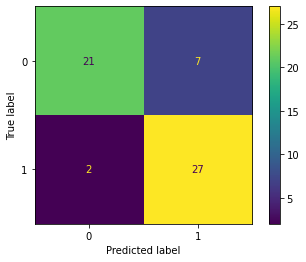

In [11]:
modelo_dc = classificador(DecisionTreeClassifier(random_state = SEED))
y_pred_dc = predicao(modelo_dc, X_test)
metricas(y_test, y_pred_dc)

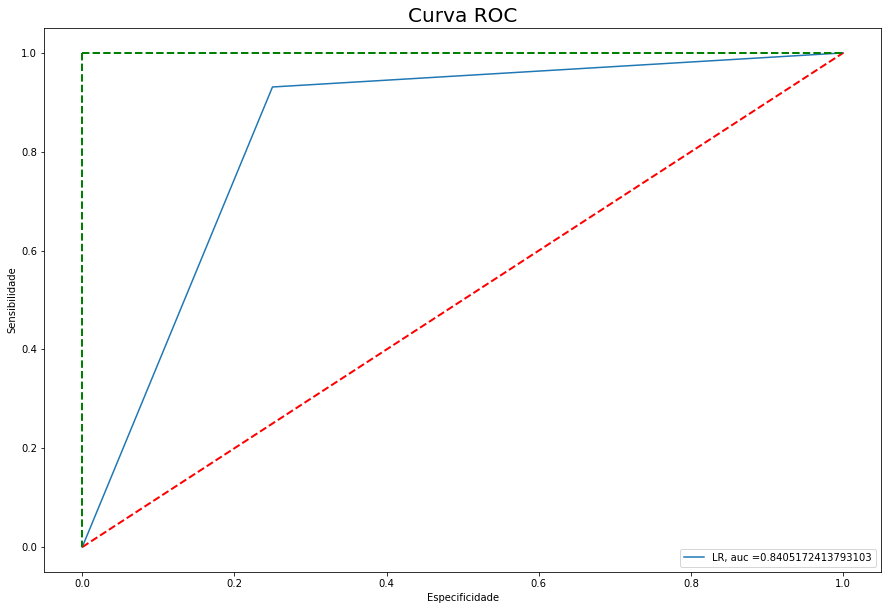

In [12]:
curva_roc(modelo_dc, X_test, y_test)

A acurácia deste modelo foi de 87.72%
A precisão deste modelo foi de 86.67%
O recall deste modelo foi de 89.66%
A taxa de f1 deste modelo foi de 88.14%


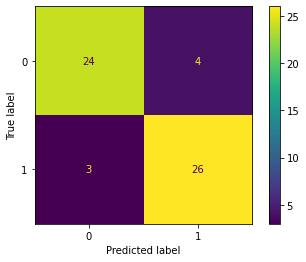

In [13]:
modelo_svc = classificador(SVC(probability= True, random_state = SEED))
y_pred_svc = predicao(modelo_svc, X_test)
metricas(y_test, y_pred_svc)

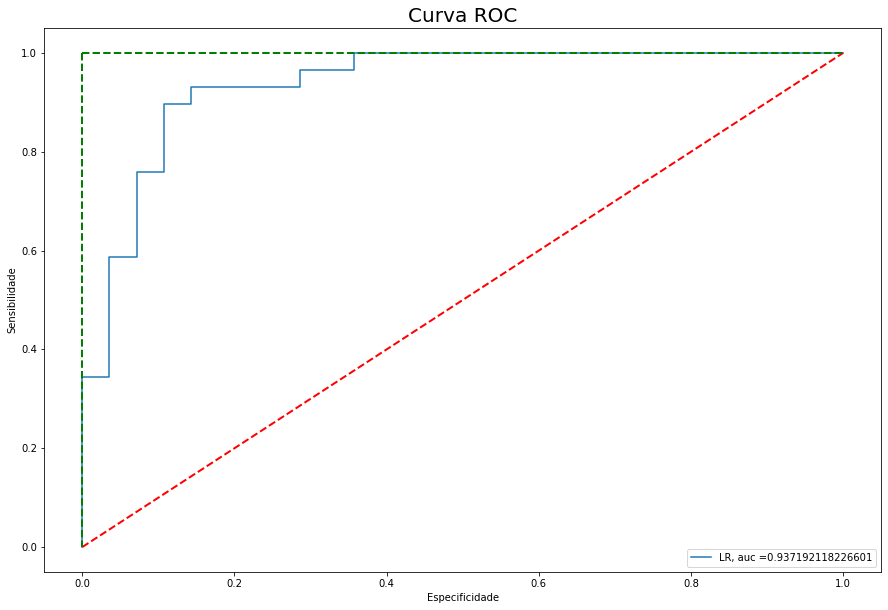

In [14]:
curva_roc(modelo_svc, X_test, y_test)

A acurácia deste modelo foi de 82.46%
A precisão deste modelo foi de 88.00%
O recall deste modelo foi de 75.86%
A taxa de f1 deste modelo foi de 81.48%


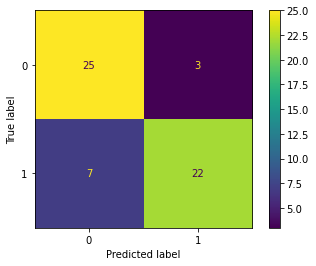

In [15]:
modelo_knn = classificador(KNeighborsClassifier())
y_pred_knn = predicao(modelo_knn, X_test)
metricas(y_test, y_pred_knn)

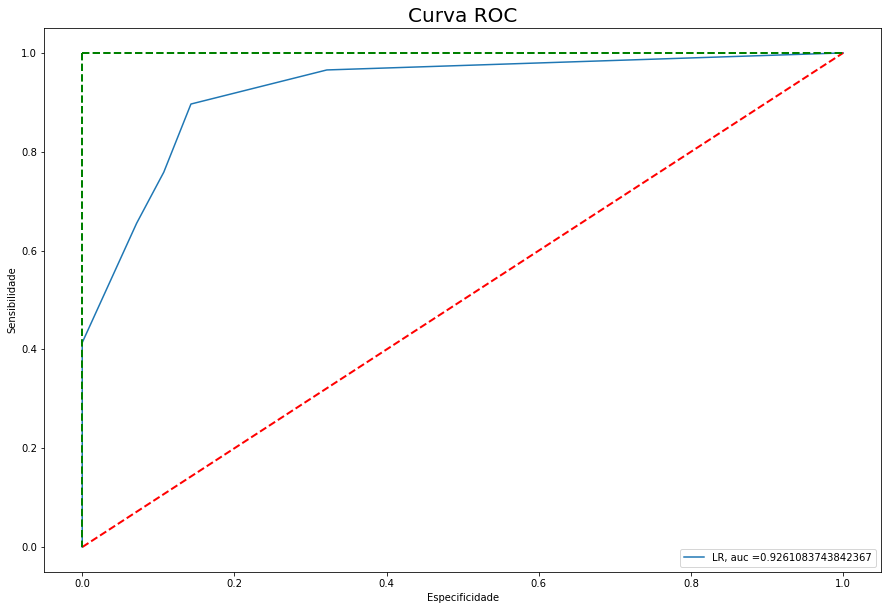

In [16]:
curva_roc(modelo_knn, X_test, y_test)

A acurácia deste modelo foi de 87.72%
A precisão deste modelo foi de 86.67%
O recall deste modelo foi de 89.66%
A taxa de f1 deste modelo foi de 88.14%


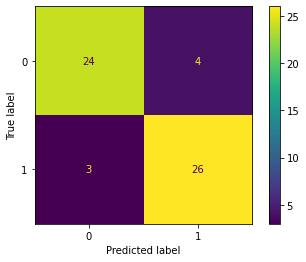

In [17]:
modelo_rf = classificador(RandomForestClassifier(random_state = SEED))
y_pred_rf = predicao(modelo_rf, X_test)
metricas(y_test, y_pred_rf)

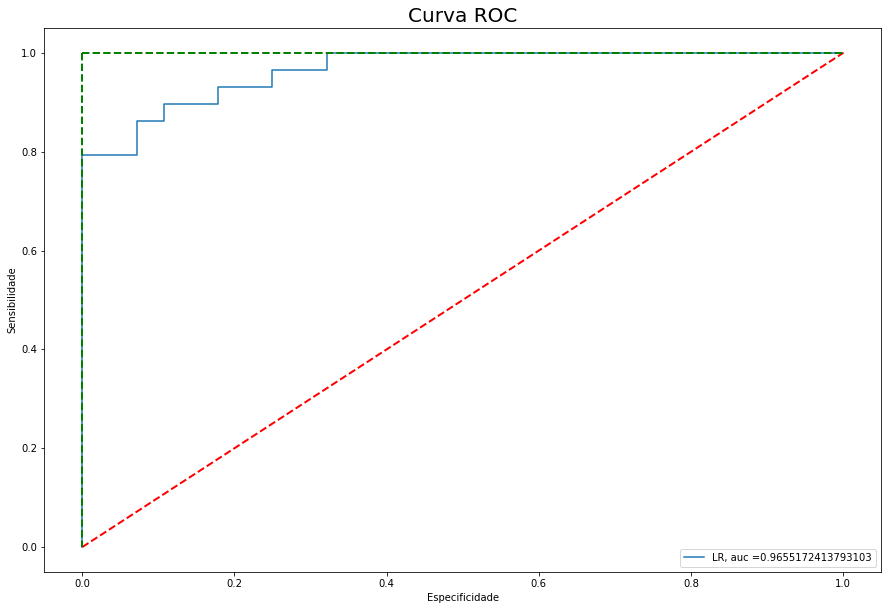

In [18]:
curva_roc(modelo_rf, X_test, y_test)

In [19]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [20]:
from lightgbm import LGBMClassifier

A acurácia deste modelo foi de 89.47%
A precisão deste modelo foi de 87.10%
O recall deste modelo foi de 93.10%
A taxa de f1 deste modelo foi de 90.00%


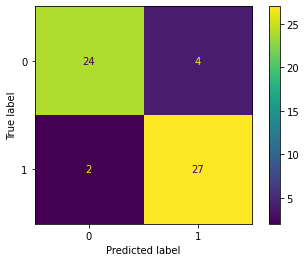

In [21]:
modelo_lgbm = classificador(LGBMClassifier(random_state = SEED))
y_pred_lgbm = predicao(modelo_lgbm, X_test)
metricas(y_test, y_pred_lgbm)

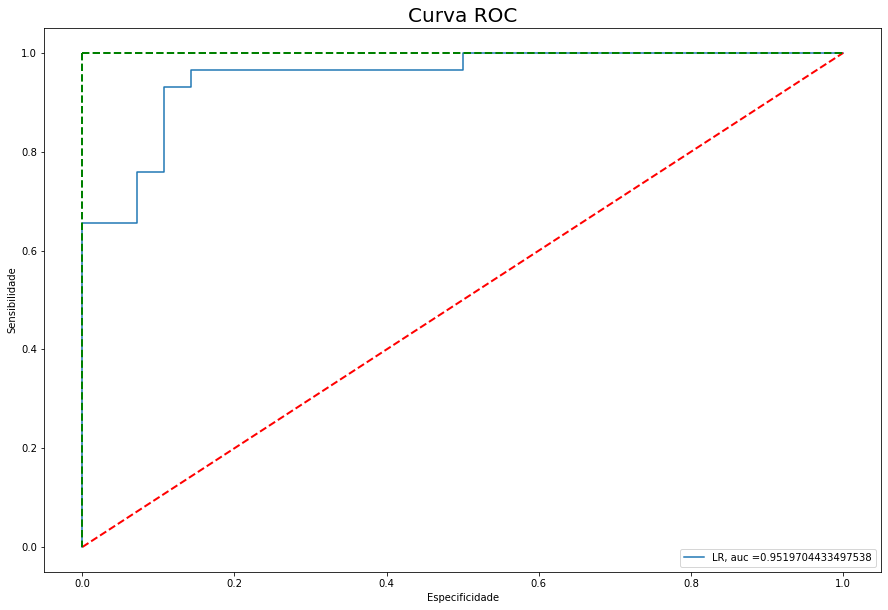

In [22]:
curva_roc(modelo_lgbm, X_test, y_test)

Irei utilizar a área sob a curva para selecionar o melhor modelo. Visto que esta métrica nos indica a qualidade das previsões do nosso modelo, ou seja, o quanto ele consegue diferenciar entre os clientes fidelizados e não fidelizados.

O modelo que apresentou a maior AUC foi o **RandomForest** então seguiremos com ele para as próxima etapas de otimização e validação.

# Otimização e validação do modelo

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

parametros = {'n_estimators':np.arange(80,200, step = 20),
              'criterion':['gini','entropy'],
              'max_depth': [2,3,5,8,13,21,34,55,89],
              'min_samples_split':np.arange(2,100, step = 20),
              'min_samples_leaf':np.arange(1,100, step = 20)}

# Definindo o CV
cv = KFold(n_splits = 8, shuffle= True, random_state = SEED)

#Instanciando o modelo RF
modelo = RandomForestClassifier(random_state = SEED)

# Instanciando o RandomizedSearchCV
randomized = RandomizedSearchCV(modelo, parametros, n_iter = 30, scoring= 'roc_auc', cv = cv, 
                                return_train_score= False, random_state= SEED)

# Realizando o ajuste do modelo
modelo_aj = randomized.fit(X,y)

# Obtendo resultado
resultado = pd.DataFrame(modelo_aj.cv_results_)
resultado.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,...,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.104103,0.003867,0.009893,0.000374,120,42,61,34,gini,"{'n_estimators': 120, 'min_samples_split': 42,...",...,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,20
1,0.152267,0.001447,0.013578,0.000241,180,62,1,34,gini,"{'n_estimators': 180, 'min_samples_split': 62,...",...,0.797203,0.942857,1.0,0.939394,1.000000,0.992424,0.939394,0.949673,0.062974,16
2,0.156984,0.006020,0.013641,0.000351,180,2,21,5,gini,"{'n_estimators': 180, 'min_samples_split': 2, ...",...,0.825175,0.935714,1.0,0.931818,0.982143,0.992424,0.939394,0.949097,0.053454,17
3,0.181347,0.052100,0.013958,0.000297,180,2,1,89,gini,"{'n_estimators': 180, 'min_samples_split': 2, ...",...,0.881119,0.978571,1.0,0.946970,1.000000,1.000000,0.939394,0.966521,0.039216,2
4,0.134044,0.001519,0.012338,0.000387,160,2,61,2,entropy,"{'n_estimators': 160, 'min_samples_split': 2, ...",...,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,20


In [27]:
modelo_aj.best_params_

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 55,
 'criterion': 'gini'}

A acurácia deste modelo foi de 87.72%
A precisão deste modelo foi de 86.67%
O recall deste modelo foi de 89.66%
A taxa de f1 deste modelo foi de 88.14%


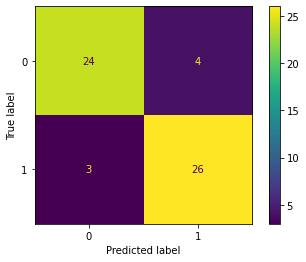

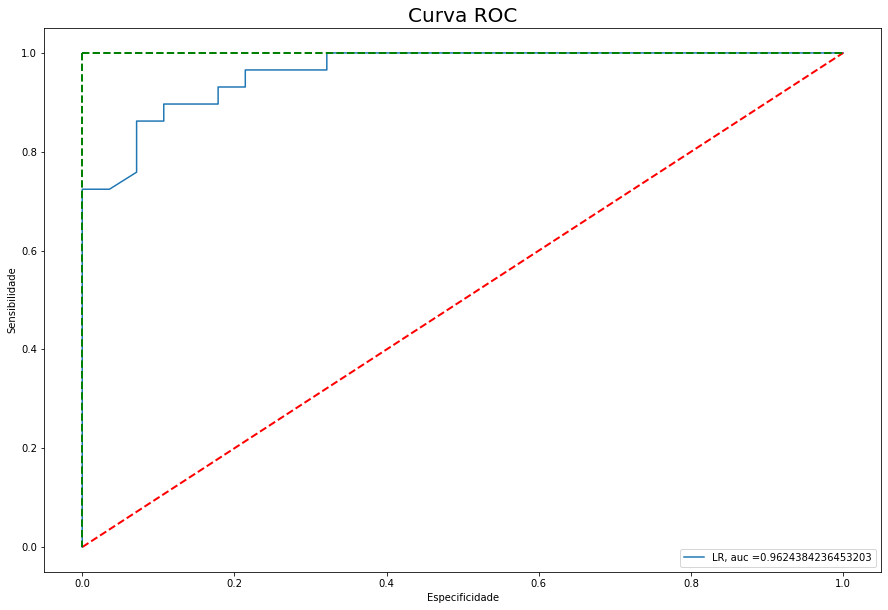

In [25]:
# instancioando o melhor modelo
best_model = classificador(RandomForestClassifier(**modelo_aj.best_params_, random_state = SEED))
y_pred_best = predicao(best_model, X_test)
metricas(y_test, y_pred_best)

# Exibindo a nova AUC_ROC
curva_roc(best_model, X_test, y_test)

In [30]:
from sklearn.model_selection import cross_val_score
# Verificando o intervalo esperado de valores da AUC_ROC
score = cross_val_score(modelo_aj, X, y, cv = cv, scoring='roc_auc')

# Verificando a média e desvio padrão
media = score.mean()*100
desv_pad = score.std()*100

print('A AUC-ROC média deste modelo é de %.2f%%'%media)
print('Espera-se que as areas sob a curva encontradas com esse modelo esteja entre [%.2f%%, %.2f%%]'%(media - 2*desv_pad, media + 2* desv_pad))

A AUC-ROC média deste modelo é de 96.98%
Espera-se que as areas sob a curva encontradas com esse modelo esteja entre [89.23%, 104.72%]
